This notebook analyze the lyrics gathered with Genius API in order to have a general idea of the themes and the general tone of the corpus that is going to be fed to GPT-2

In [1]:
%%capture
!pip install vaderSentiment

In [2]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import json
import re
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
plt.style.use('seaborn')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def word_cloud(corpus, output):
  wordcloud = WordCloud(width=1920, height=1080, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  wordcloud.generate(corpus)
  if output != None:
    wordcloud.to_file(output + '_wordcloud.png')
  return wordcloud.to_image()

def clear_text(text, stopwords_extention):
  stopwords = nltk.corpus.stopwords.words("english")
  if stopwords_extention != None:
    stopwords.extend(stopwords_extention)
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  words = tokenizer.tokenize(text)
  clean_text = [w for w in words if w.lower() not in stopwords]
  return clean_text

def get_common_words(text, number):
  frequency = nltk.FreqDist(clear_text(text, None))
  return frequency.most_common(number)

In [4]:
lyrics = []
counter = 0
segnibrutti = ["URLCopyEmbedCopy", '\d+EmbedShare', 'EmbedShare']
lista_canz = [] #some cases that have weird symbols/punctuation
dict_lyrics= {}
for filename in os.listdir("/content/drive/MyDrive/Colab_Notebooks/lyrics_generator/lyrics/General"): 
  if ".json" in filename:
    with open("/content/drive/MyDrive/Colab_Notebooks/lyrics_generator/lyrics/General/"+filename, encoding='utf-8') as json_file:
      data = json.load(json_file)
      dict_lyrics[data["name"]] = {}
      lista_album = {}
      for track in data["songs"]:
        canz = track["title"]
        lyric = track["lyrics"]
        lyric =  re.sub('\n{2,}',  '\n', lyric) #clear more than 1 linebreak
        for segno in segnibrutti:
          lyric = re.sub(segno.lower(), "", lyric.lower())
          #lyric =  re.sub('\[(.*?)\]',  '', lyric) 
        counter = 0
        for car in lyric:
          if car == "\n":
            counter += 1
            if counter > len(lyric) / 15:
              lista_canz.append(canz)  
        #sent_score = sentiment_analyzer_scores(lyric)
        if canz not in lista_canz and lyric != "" and not ("demo" in canz.lower() or "live" in canz.lower() or
                                                           "version" in canz.lower() or "session" in canz.lower() or "mix" in canz.lower() or "remix" in canz.lower() or "rmx" in canz.lower()):# and float(sent_score["compound"]) < 0.96: #filter for outliers 
          lista_album[canz] = lyric
          lista_canz.append(canz)
          lyrics.append(lyric)
        dict_lyrics[data["name"]] = lista_album
print(len(lista_canz))


6041


Let's see how many lyrics we have for each artist

In [7]:
artists = []
for key, value in dict_lyrics.items():
  print(key, len(value))
  artists.append(key)
print(sorted(artists))

Alice in Chains 118
Beach House 90
Muse 88
Pixies 81
Queens of the Stone Age 105
Silver Jews 64
Sparklehorse 79
Spiritualized 97
The National 120
The Strokes 89
Unwound 87
Wilco 114
Have a Nice Life 40
Interpol 85
Built to Spill 111
Blur 113
Arcade Fire 123
Neutral Milk Hotel 89
Pavement 121
Slowdive 68
Bauhaus 73
Joy Division 56
Modest Mouse 145
Mount Eerie 142
Nirvana 120
Red House Painters 66
Swans 127
The Cure 145
The Smashing Pumpkins 143
The Velvet Underground 74
Tool 63
The Beatles 141
The Beach Boys 138
Manic Street Preachers 146
Nine Inch Nails 123
Dinosaur Jr. 143
Radiohead 140
Sonic Youth 141
The Smiths 92
Car Seat Headrest 136
The Jesus and Mary Chain 136
Deerhunter 79
Nick Cave & The Bad Seeds 146
Yo La Tengo 131
American Football 28
Carissa’s Wierd 44
La Dispute 75
​mewithoutYou 101
Mineral 29
Sunny Day Real Estate 46
The Black Heart Procession 69
The Hotelier 36
The Microphones 128
TTNG 43
Counting Crows 127
Delta Sleep 37
Empire! Empire! (I was A Lonely Estate) 58
Tiny 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0, flags=flags)


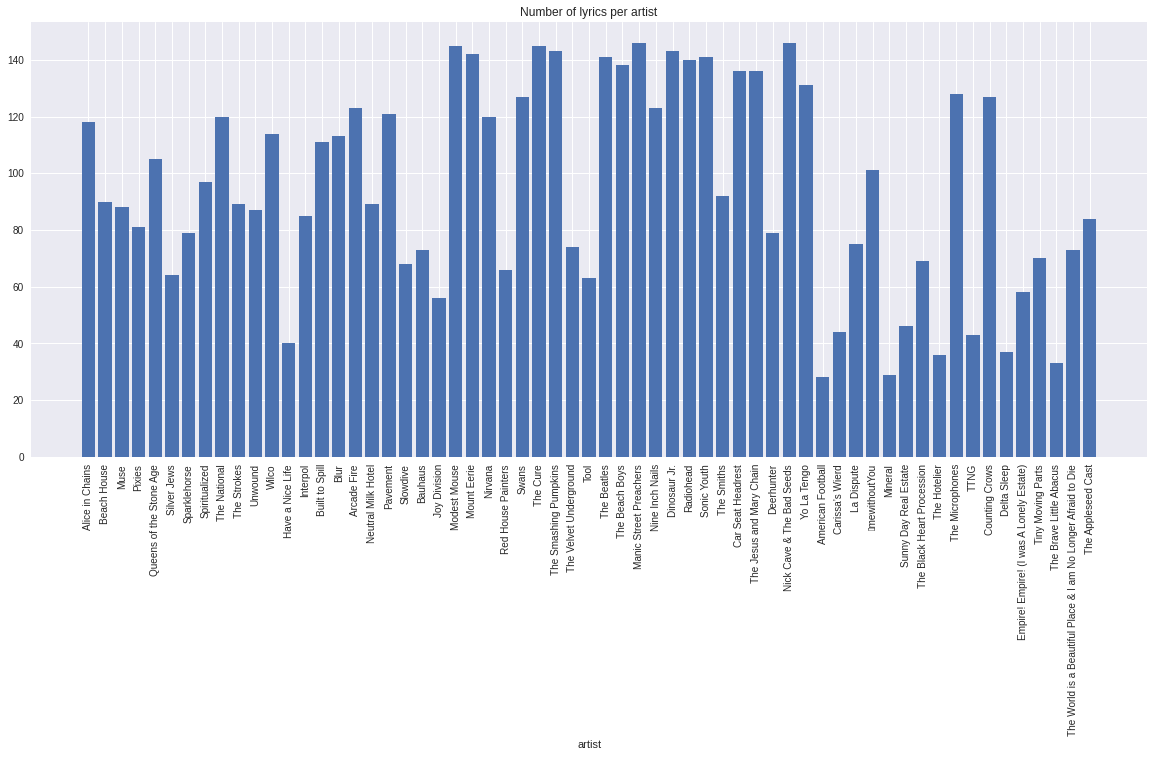

In [6]:
  x = []
  y = []
  for key, value in dict_lyrics.items():
    x.append(key)
    y.append(len(value.keys()))
  fig = plt.figure(figsize=(20,8))
  plt.xlabel('artist')
  plt.title('Number of lyrics per artist')
  plt.bar(x,y)
  plt.xticks(rotation=90)
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/lyrics_generator/lyrics/General/total_artists.png', dpi=750, facecolor='w', edgecolor='w',
  orientation='portrait', papertype=None, format=None,
  transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
  plt.show()  

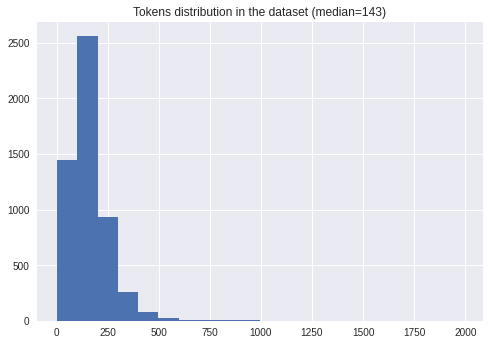

143


In [ ]:
from statistics import median
x = []
for key, value in dict_lyrics.items():
  for canz, lyric in value.items():
    tmp = lyric.split(" ")
    x.append(len(tmp))



# the histogram of the data
n, bins, patches = plt.hist(x, 20, density=False)
plt.title('Tokens distribution in the dataset (median='+str(median(x))+')')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/lyrics_generator/lyrics/General/tokens_distribution.png', dpi=100, facecolor='w', edgecolor='w',
orientation='portrait', papertype=None, format=None,
transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
plt.grid(True)
plt.show()

print(median(x))

In [ ]:
for key, value in dict_lyrics.items(): #we should check if there are some empty lyrics (for instance intrumental songs)
  for canz, lyric in value.items():
    counter = 0
    for car in lyric:
      if car == "\n":
        counter += 1
    if counter > len(lyric) / 15:
      print(counter, canz, key)


Using VADER, I create a dictionary with the average sentiment score of each artist, then plot the results. This give a general idea of the positive/negative vibes of the lyrics corpus.

In [ ]:
sent_artist = {}
for key, value in dict_lyrics.items(): 
  values = []
  for canz, lyric in value.items():
    sent_score = sentiment_analyzer_scores(lyric.lower())
    values.append(float(sent_score["compound"]))
  average = statistics.mean(values)
  sent_artist[str(key)] = average

print(sent_artist)

{'Alice in Chains': -0.24823898305084746, 'Beach House': 0.46992333333333336, 'Muse': 0.11969772727272728, 'Pixies': 0.2762827160493827, 'Queens of the Stone Age': 0.21100095238095237, 'Silver Jews': 0.1730734375, 'Sparklehorse': 0.17622151898734179, 'Spiritualized': 0.3261546391752577, 'The National': 0.26088666666666666, 'The Strokes': 0.17088539325842697, 'Unwound': -0.27744137931034485, 'Wilco': 0.3161482456140351, 'Have a Nice Life': -0.1303025, 'Interpol': 0.5010576470588235, 'Built to Spill': 0.1264972972972973, 'Blur': 0.16448849557522124, 'Arcade Fire': 0.12475934959349594, 'Neutral Milk Hotel': 0.4377808988764045, 'Pavement': 0.1309487603305785, 'Slowdive': 0.3917264705882353, 'Bauhaus': -0.0753082191780822, 'Joy Division': -0.007723214285714286, 'Modest Mouse': 0.13360758620689656, 'Mount Eerie': 0.04292464788732395, 'Nirvana': 0.08316166666666668, 'Red House Painters': 0.17510303030303032, 'Swans': 0.11046377952755905, 'The Cure': 0.35617793103448275, 'The Smashing Pumpkins

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0, flags=flags)


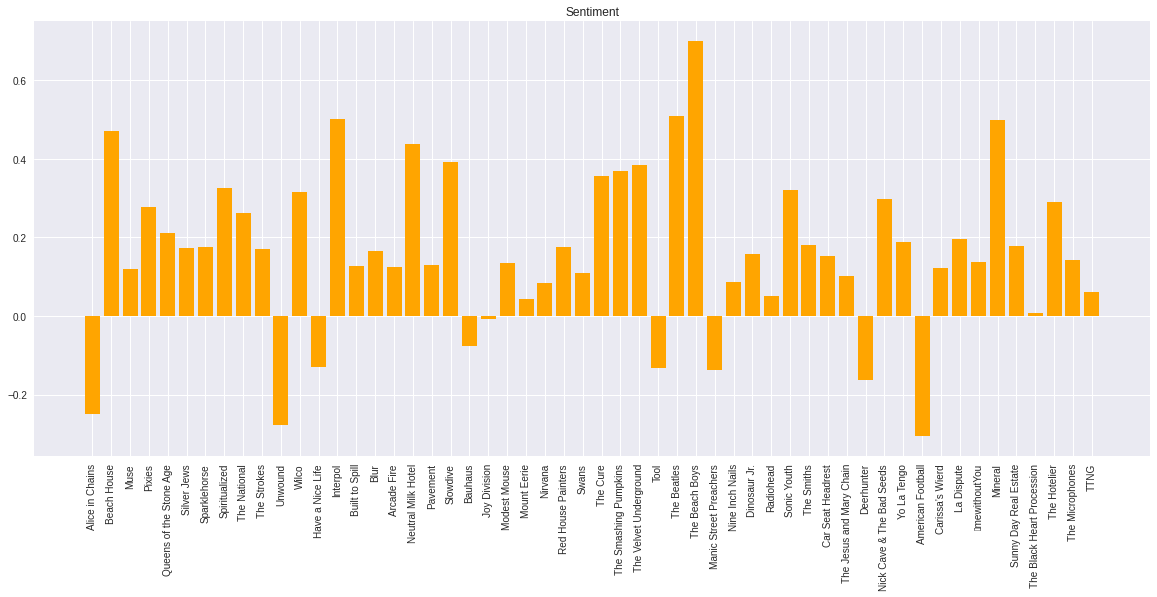

In [ ]:
  x = []
  y = []
  for keys, values in sent_artist.items():
    x.append(keys)
    y.append(float(values))
  fig = plt.figure(figsize=(20,8))
  plt.xlabel('')
  plt.title('Sentiment')
  plt.bar(x,y, color=['orange'])
  plt.xticks(rotation=90)
  plt.savefig('prova', dpi=1000, facecolor='w', edgecolor='w',
  orientation='portrait', papertype=None, format=None,
  transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
  plt.show()  

With NLKT I perform some basic textual analysis to see the most frequent words and plot them with WorldCloud. Despite the pre-processing, this seems insufficient to determine what are the main topic of the corpus, as there is a lot of noise due to common words.

In [ ]:
more_stopwords = ["Oh", "oh", "la", "ah", "Ooh", "ooh", "na", "ça", "zumbi", "är", "zoos", "zé"
                  "éternelle", "zwei", "zwei", "zyklon", "über", "überhaupt", "übermensch", "pt", "unplugged"]
text = ""
for art in dict_lyrics.keys():
  for canz in dict_lyrics[art]:
    lyrics = canz
    text = text + lyrics.lower()

text = clear_text(text, more_stopwords)
text = " ".join(text)

In [ ]:
get_common_words(text, 50)

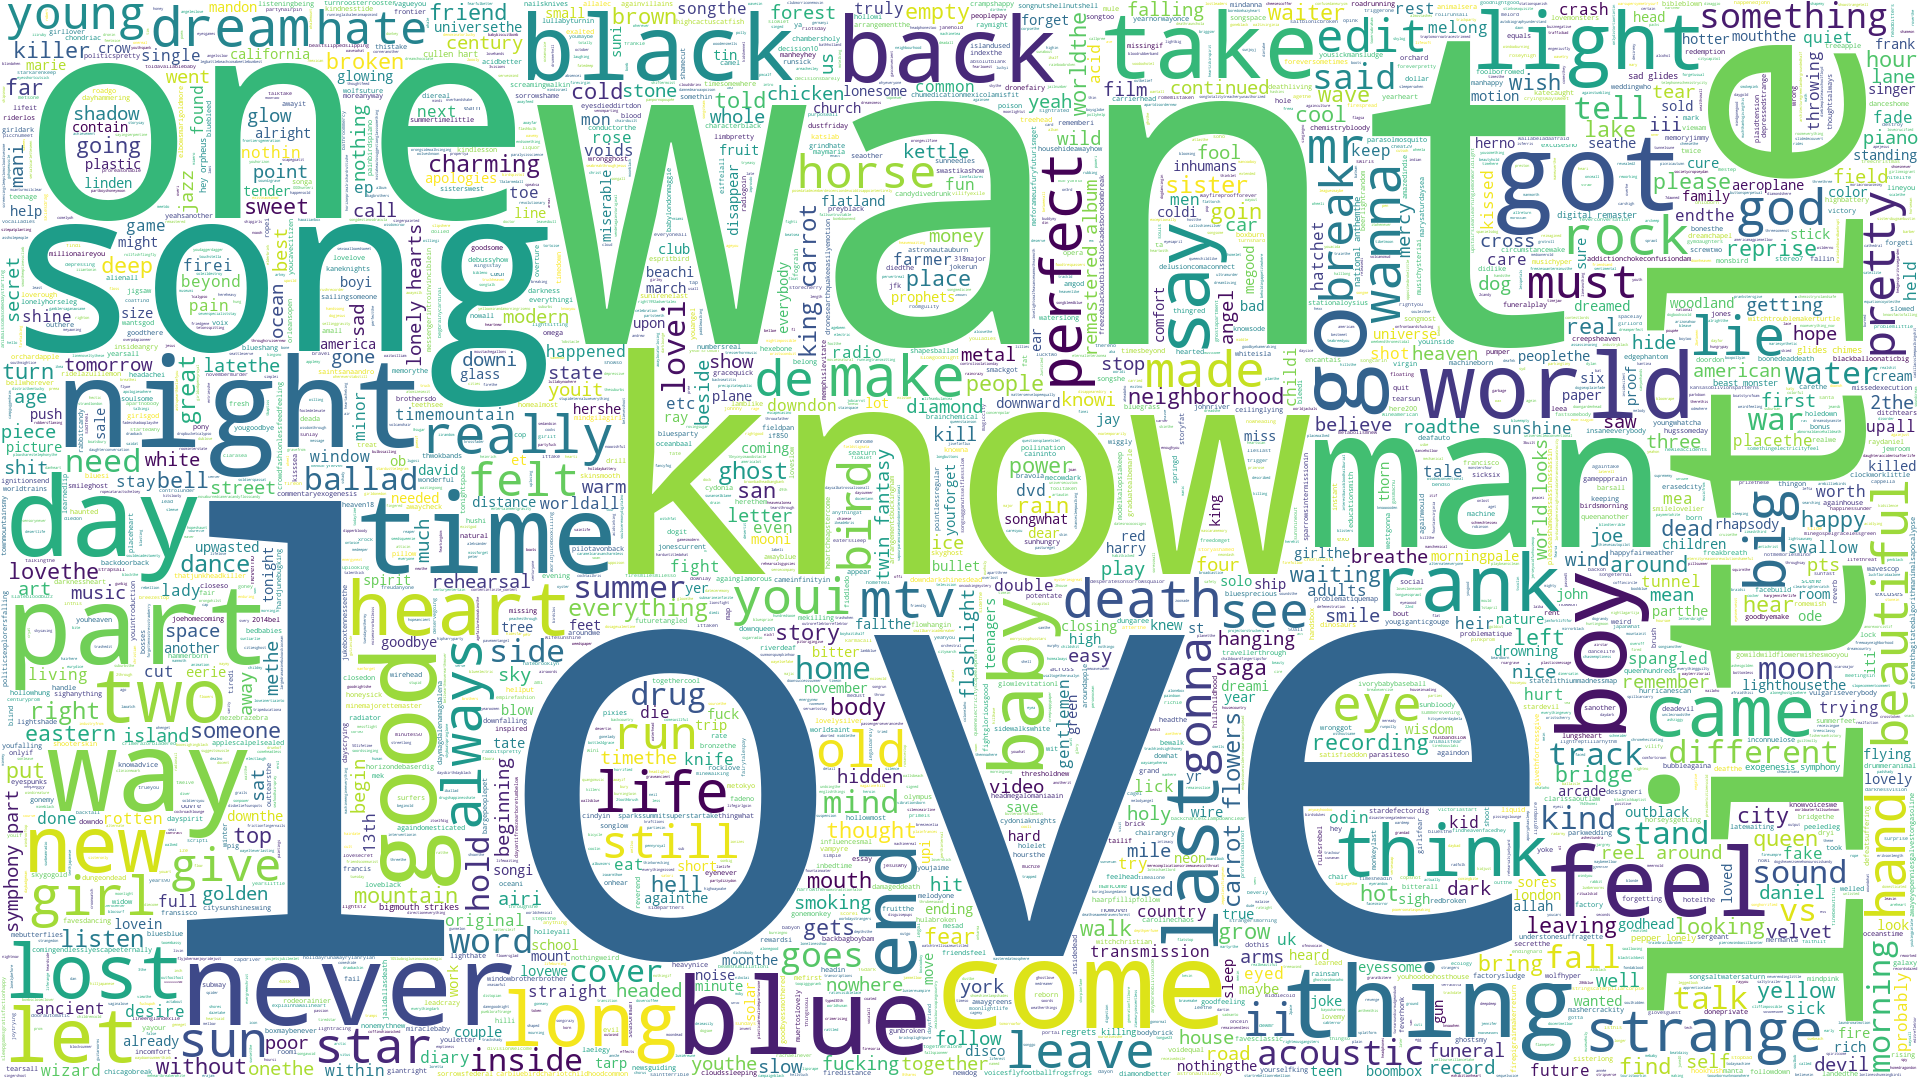

In [ ]:
word_cloud(text, "cloud_lyrics")

In [ ]:
word_cloud(text, "prova_deprex2")

The following code perform a simple topic modelling analysis using Gensim. More details can be found on the Sievert & Shivel (2014) paper. The words that are going to be extracted as topic are going to be used for the conditional generation text part with PPLM.

In [ ]:
!pip install --upgrade gensim


     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

from sklearn.feature_extraction.text import TfidfVectorizer
import six

In [ ]:
from collections import defaultdict
more_stopwords = ["Oh", "oh", "la", "ah", "Ooh", "ooh", "na", "ça", "zumbi", "är", "zoos", "zé"
                  "éternelle", "zwei", "zwei", "zyklon", "über", "überhaupt", "übermensch"]
Corpus =  []
for art in dict_lyrics.keys():
  text = ""
  for canz in dict_lyrics[art]:
    text = text + canz.lower()
  text = clear_text(text, more_stopwords)
  text = " ".join(text)
  Corpus.append(text)
# Create a set of frequent words
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(more_stopwords)
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stopwords]
         for document in Corpus]

# Count word frequencies
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]


In [ ]:
dictionary = corpora.Dictionary(processed_corpus)
dictionary.token2id
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
doc_lda = lda_model[bow_corpus]

In [ ]:
#we need the following to plot the results
!pip install --upgrade pandas==1.2 #we need a different version of pd for this
!pip install pyldavis

     |████████████████████████████████| 9.9 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.0 which is incompatible.


     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 61 kB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=75e70f45714d2be2b2dfef59f19fee9dd0dfa642e0e26f9935169ecff8ae105a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatib

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pandas as pd
import pickle

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = './happy'+str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
      pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
      LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './happy'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.001208 -0.004080       1        1  26.676426
7      0.000749 -0.001627       2        1  24.626112
8      0.003529  0.000125       3        1  11.602931
0      0.000923 -0.002419       4        1   9.204195
4     -0.003472  0.000853       5        1   7.222018
2      0.002925  0.002037       6        1   6.020319
6     -0.001652 -0.001792       7        1   5.448209
1     -0.005377  0.001738       8        1   4.278322
5     -0.000276  0.004462       9        1   3.291052
9      0.003858  0.000702      10        1   1.630415, topic_info=       Term         Freq        Total Category  logprob  loglift
943    love  8893.000000  8893.000000  Default  30.0000  30.0000
851    know  6099.000000  6099.000000  Default  29.0000  29.0000
902    like  5851.000000  5851.000000  Default  28.0000  28.0000
1778   yeah  5163.000000  5163.000000  Default  27.0000  27.0000
75     baby  4441.000000  4441.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1048  never    38.542020  3006.389672  Topic10  -5.2505  -0.2404
641      go    40.287003  3538.246170  Topic10  -5.2062  -0.3590
1053  night    31.421545  2101.337051  Topic10  -5.4548  -0.0865
1268    say    35.563638  3014.213591  Topic10  -5.3309  -0.3234
722     hey    28.617875  1945.529364  Topic10  -5.5482  -0.1029

[876 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3056      1  0.222285    8
3056      2  0.177828    8
3056      3  0.133371    8
3056      4  0.148190    8
3056      5  0.088914    8
...     ...       ...  ...
6173      1  0.158356   싶어
6173      2  0.158356   싶어
6173      3  0.158356   싶어
6173      4  0.158356   싶어
6173      7  0.158356   싶어

[3432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 9, 1, 5, 3, 7, 2, 6, 10])